In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [21]:
suv_data = pd.read_csv("suv_data.csv")
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


# Analyze data

<Axes: xlabel='Purchased', ylabel='count'>

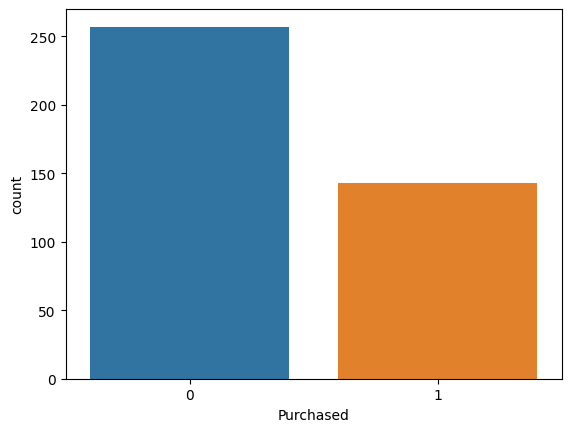

In [22]:
sns.countplot(x="Purchased",data=suv_data)

<Axes: xlabel='Purchased', ylabel='count'>

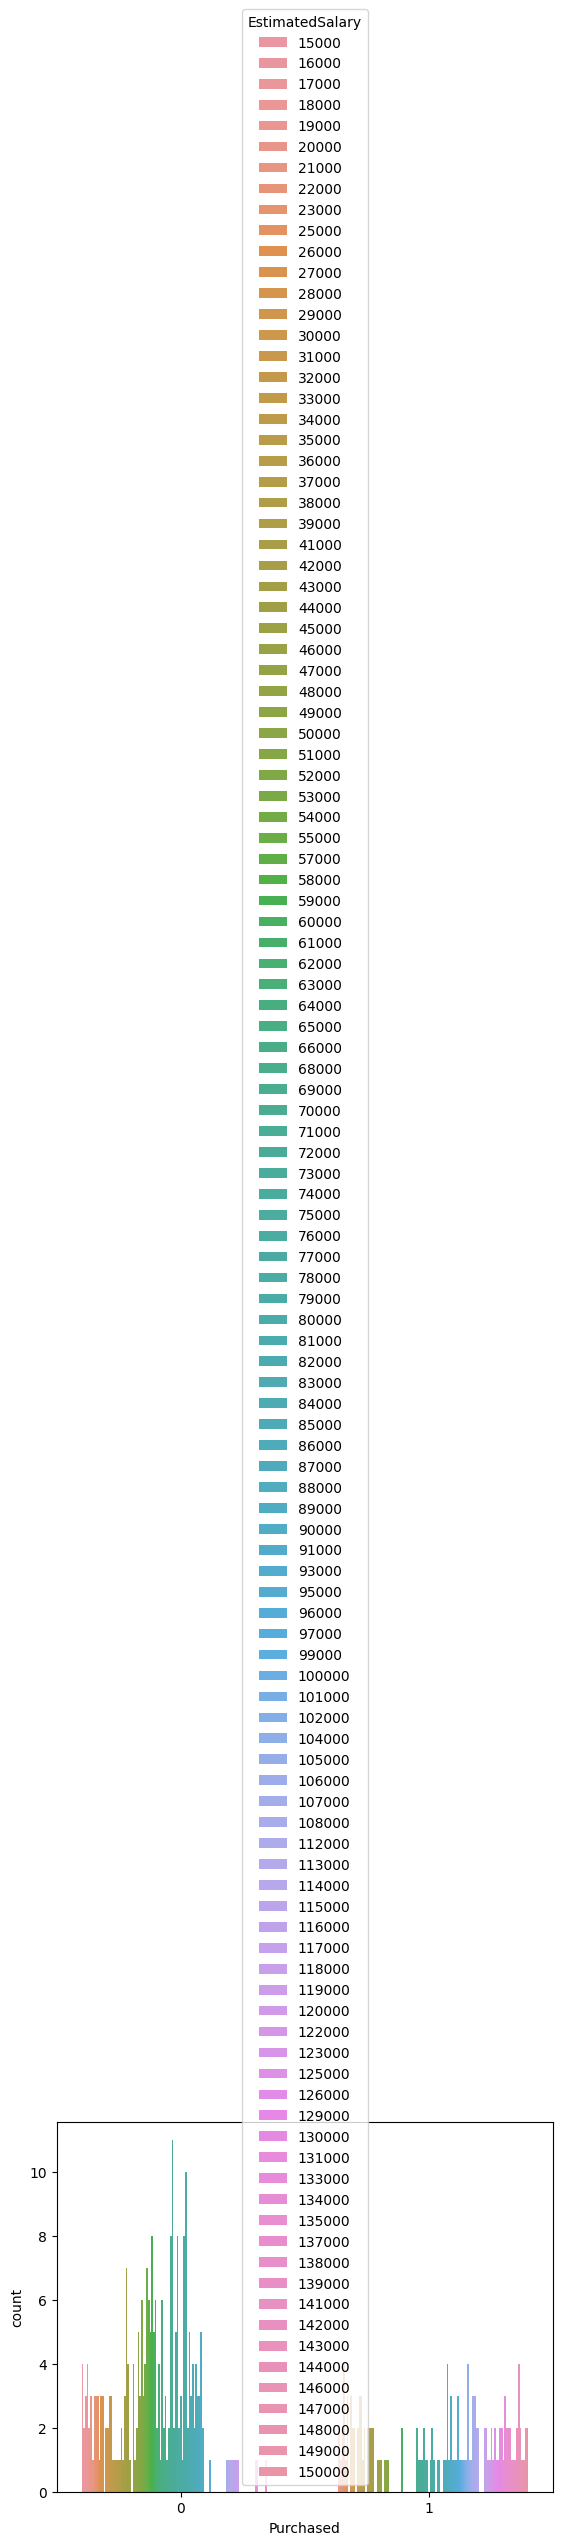

In [23]:
sns.countplot(x="Purchased",hue="EstimatedSalary",data=suv_data)

## Data Wrangling

In [24]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
suv_data.drop("User ID", axis=1, inplace=True)

In [26]:
suv_data.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [27]:
gender = pd.get_dummies(suv_data['Gender'],drop_first=True,dtype=int)
gender.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


In [28]:
suv_data = pd.concat([suv_data, gender ],axis=1)
suv_data.head(5)

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [29]:
suv_data.drop("Gender",axis=1,inplace=True)
suv_data.head(5)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [44]:
suv_data.drop("Age",axis=1,inplace=True)
suv_data.head(5)

,EstimatedSalary,Purchased,Male
0,19000,0,1
1,20000,0,1
2,43000,0,0
3,57000,0,0
4,76000,0,1


## Train and Test

In [45]:
X= suv_data.drop("Purchased",axis=1)
y= suv_data["Purchased"]

# Convert titles to str to fix error
X.columns = X.columns.astype(str) 
X.head(5)

,EstimatedSalary,Male
0,19000,1
1,20000,1
2,43000,0
3,57000,0
4,76000,1


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [48]:
X_train

,EstimatedSalary,Male
39,31000,0
167,71000,0
383,28000,1
221,91000,1
351,75000,1
...,...,...
255,90000,0
72,23000,0
396,23000,1
235,79000,1


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()


In [51]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [52]:
predictions = logmodel.predict(X_test)

In [53]:
from sklearn.metrics import classification_report

In [54]:
classification_report(y_test, predictions)

C:\Users\arobc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arobc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\arobc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

'              precision    recall  f1-score   support\n\n           0       0.60      1.00      0.75        72\n           1       0.00      0.00      0.00        48\n\n    accuracy                           0.60       120\n   macro avg       0.30      0.50      0.37       120\nweighted avg       0.36      0.60      0.45       120\n'

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test, predictions)

array([[72,  0],
       [48,  0]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(y_test, predictions)

0.6

## Retry

In [60]:
suv_data = pd.read_csv("suv_data.csv")
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [61]:
X = suv_data.iloc[:,[2,3]].values
y =suv_data.iloc[:,4].values

In [62]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [63]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
logmodel = LogisticRegression(random_state=0)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [81]:
predictions = logmodel.predict(X_test)

In [82]:
from sklearn.metrics import accuracy_score

In [84]:
accuracy_score(y_test, predictions) * 100

89.0